# Visualize and Explore Data

In [1]:
# Cheers to Brunna Torino for their great analysis of real estate prices in Amsterdam 
# (https://towardsdatascience.com/ai-and-real-state-renting-in-amsterdam-part-1-5fce18238dbc)
# The ideas have been repurposed here to deal with the Washington, DC real estate market!

In [1]:
import pandas as pd
import gmaps

apts = pd.read_csv('ApartmentList_Cleaned.csv')
gmaps.configure(api_key='YOUR_KEY_HERE')

In [76]:
# Heatmap of DC rental apartment locations
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(
  apts[['latitude','longitude']],
  weights=apts['apt_rent'],
  max_intensity = 1000,
  point_radius=6.0
)

fig.add_layer(heatmap_layer)
fig

# Most apartments are centered in the highly popular NW corridor, although many also surround Capitol Hill.
# It is interesting to see the cluster of apartments up Connecticut Avenue towards Maryland.

Figure(layout=FigureLayout(height='420px'))

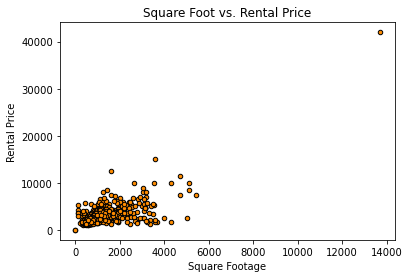

In [77]:
# Compare surface area to house price

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(apts['apt_footage'],apts['apt_rent'], s=20, edgecolor="black",c="darkorange")
plt.xlabel("Square Footage")
plt.ylabel("Rental Price")
plt.title("Square Foot vs. Rental Price")
plt.show()

In [78]:
# Whoa, there is one apartment out there with REMARKABLY high square footage and price.
# Let's check that one out
apts[apts['apt_footage'] == apts['apt_footage'].max()]

# This is an 8-bedroom townhouse available in the Georgetown area, one of the most expensive in the city. 
# No wonder it costs so much!
# Lets remove it from our analysis though as a clear outlier

,building_name,building_address,building_description,building_units_available,apt_type,apt_rent,apt_footage,rooms,latitude,longitude,distance_wh,distance_cap
1383,2507 FOXHALL ROAD NW,"2507 Foxhall Road Northwest, Washington, DC","Welcome to 2507 Foxhall Rd., a stunning 14,000...",1,8 Bedrooms,42000,13686.0,9,38.923778,-77.089317,5476,7943


In [79]:
# Removing outliers more than 10 standard deviations from the mean.
apts['zscore_price'] = (apts['apt_rent'] - apts['apt_rent'].mean())/apts['apt_rent'].std(ddof=0)
apts_no_outliers = apts[np.abs(apts['zscore_price']) < 10]
apts_no_outliers.to_csv('ApartmentList_Cleaned_NoOutliers.csv', index = False)

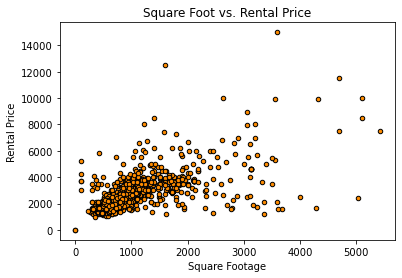

In [80]:
# Let's try this again. Compare surface area to house price

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(apts_no_outliers['apt_footage'],apts_no_outliers['apt_rent'], s=20, edgecolor="black",c="darkorange")
plt.xlabel("Square Footage")
plt.ylabel("Rental Price")
plt.title("Square Foot vs. Rental Price")
plt.show()

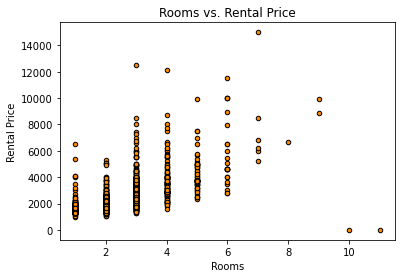

In [81]:
# Now we can take a look at rooms vs rental price


plt.figure()
plt.scatter(apts_no_outliers['rooms'],apts_no_outliers['apt_rent'], s=20, edgecolor="black",c="darkorange")
plt.xlabel("Rooms")
plt.ylabel("Rental Price")
plt.title("Rooms vs. Rental Price")
plt.show()

In [83]:
# Extract most flattering descriptions
apts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   building_name             1998 non-null   object 
 1   building_address          1998 non-null   object 
 2   building_description      1998 non-null   object 
 3   building_units_available  1998 non-null   int64  
 4   apt_type                  1998 non-null   object 
 5   apt_rent                  1998 non-null   int64  
 6   apt_footage               1857 non-null   float64
 7   rooms                     1998 non-null   int64  
 8   latitude                  1998 non-null   float64
 9   longitude                 1998 non-null   float64
 10  distance_wh               1998 non-null   int64  
 11  distance_cap              1998 non-null   int64  
 12  zscore_price              1998 non-null   float64
dtypes: float64(4), int64(5), object(4)
memory usage: 203.0+ KB
